In [1]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Se importan las funciones personalizadas
import sys
sys.path.append('..\\utils\\')

## 1. Importando las librerías

In [3]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler, PolynomialFeatures

from tensorflow import keras
from keras.callbacks import ModelCheckpoint

## 2. Leyendo los datos

In [4]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv', sep=';')
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## 3. Separando los datos en las variables predictoras (**X**) y la variable a predecir (y)

In [5]:
X = dataset.drop(columns=['charges'], axis=1)
y = dataset['charges']

## 4. Separando las datos en train y test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Realizando el escalimiento robusto de las varibales predictoras

In [7]:
scaler_train    = RobustScaler()
scaler_test     = RobustScaler()

X_train_esc = scaler_train.fit_transform(X=X_train)
X_test_esc  = scaler_test.fit_transform(X=X_test)

## 6. Creación del modelo de red neuronal

In [8]:
#Definiendo las capas
entrada         = keras.layers.Input(shape=X_train_esc.shape[1:], name='capa_de_entrada')
capa_oculta_1   = keras.layers.Dense(300, activation='relu', name='capa_oculta_1')(entrada)
capa_oculta_2   = keras.layers.Dense(300, activation='relu', name='capa_oculta_2')(capa_oculta_1)
capa_oculta_3   = keras.layers.Dense(300, activation='relu', name='capa_oculta_3')(capa_oculta_2)
capa_oculta_4   = keras.layers.Dense(300, activation='relu', name='capa_oculta_4')(capa_oculta_3)
capa_oculta_5   = keras.layers.Dense(300, activation='relu', name='capa_oculta_5')(capa_oculta_4)
capa_oculta_6   = keras.layers.Dense(300, activation='relu', name='capa_oculta_6')(capa_oculta_5)
capa_oculta_7   = keras.layers.Dense(300, activation='relu', name='capa_oculta_7')(capa_oculta_6)
capa_oculta_8   = keras.layers.Dense(300, activation='relu', name='capa_oculta_8')(capa_oculta_7)
capa_oculta_9   = keras.layers.Dense(300, activation='relu', name='capa_oculta_9')(capa_oculta_8)
capa_oculta_10   = keras.layers.Dense(300, activation='relu', name='capa_oculta_10')(capa_oculta_9)
# capa_oculta_11   = keras.layers.Dense(300, activation='relu', name='capa_oculta_11')(capa_oculta_10)
# capa_oculta_12   = keras.layers.Dense(300, activation='relu', name='capa_oculta_12')(capa_oculta_11)
# capa_oculta_13   = keras.layers.Dense(300, activation='relu', name='capa_oculta_13')(capa_oculta_12)
# capa_oculta_14   = keras.layers.Dense(300, activation='relu', name='capa_oculta_14')(capa_oculta_13)
# capa_oculta_15   = keras.layers.Dense(300, activation='relu', name='capa_oculta_15')(capa_oculta_14)
# capa_oculta_16   = keras.layers.Dense(300, activation='relu', name='capa_oculta_16')(capa_oculta_15)
# capa_oculta_17   = keras.layers.Dense(300, activation='relu', name='capa_oculta_17')(capa_oculta_16)
# capa_oculta_18   = keras.layers.Dense(300, activation='relu', name='capa_oculta_18')(capa_oculta_17)
# capa_oculta_19   = keras.layers.Dense(300, activation='relu', name='capa_oculta_19')(capa_oculta_18)
# capa_oculta_20   = keras.layers.Dense(300, activation='relu', name='capa_oculta_20')(capa_oculta_19)
salida          = keras.layers.Dense(1, activation='linear', name='capa_de_salida')(capa_oculta_10)

#Creando el modelo
modelo = keras.Model(inputs=[entrada], outputs=[salida])

## 7. Compilando el modelo

In [9]:
modelo.compile(loss='huber_loss', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=[])

## 8. Entrenando el modelo

In [10]:
checkpoint = ModelCheckpoint(
    filepath='..\modelos_guardados\modelo_redes_neuronales.h5',
    monitor='loss',
    save_best_only=True
)

history = modelo.fit(X_train_esc, y_train, epochs=100, validation_batch_size=0.2, callbacks=[checkpoint])

Epoch 1/100
30/30 [==============================] - 2s 18ms/step - loss: 13034.2002
Epoch 2/100
30/30 [==============================] - 1s 21ms/step - loss: 13007.0664
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 11493.5615
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 7985.7705
Epoch 5/100
30/30 [==============================] - 1s 19ms/step - loss: 7265.3750
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 6631.4004
Epoch 7/100
30/30 [==============================] - 1s 18ms/step - loss: 5919.0098
Epoch 8/100
30/30 [==============================] - 1s 24ms/step - loss: 4947.6035
Epoch 9/100
30/30 [==============================] - 1s 19ms/step - loss: 4110.3965
Epoch 10/100
30/30 [==============================] - 1s 19ms/step - loss: 3720.1057
Epoch 11/100
30/30 [==============================] - 1s 19ms/step - loss: 3530.4844
Epoch 12/100
30/30 [==============================] - 1s 24ms/step - lo

## 9. Se carga el mejor modelo entrenado

In [11]:
modelo = keras.models.load_model('..\modelos_guardados\modelo_redes_neuronales.h5')

## 10. Evaluación del modelo

In [12]:
modelo.evaluate(X_test_esc, y_test)

13/13 [==============================] - 0s 7ms/step - loss: 2696.6736


2696.673583984375

In [13]:
y_pred = modelo.predict(X_test_esc)

r2_score(y_true=y_test, y_pred=y_pred)

13/13 [==============================] - 0s 4ms/step


0.8385343943572445

## 11. Visualización de lo resultados

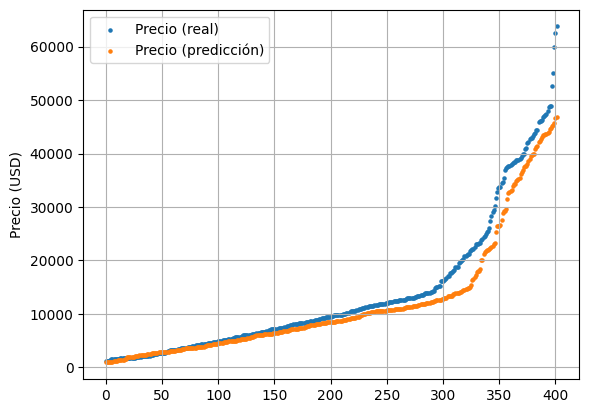

In [14]:
y_t = y_test.values
y_t.sort(axis=0)
y_pred.sort(axis=0)
x = range(y_t.size)

plt.scatter(x, y_t, s=5, label='Precio (real)')
plt.scatter(x, y_pred, s=5, label='Precio (predicción)')
plt.ylabel('Precio (USD)')
plt.grid()
plt.legend()
plt.show()